In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve,roc_curve, auc
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [2]:
!pip install mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 5.4 MB/s eta 0:00:00


In [3]:
from google.colab import files

uploaded = files.upload()


Saving week_approach_maskedID_timeseries.csv to week_approach_maskedID_timeseries.csv


In [4]:
import pandas as pd
# Load the daily approach dataset
weekly_file_path = 'week_approach_maskedID_timeseries.csv'  # Use the correct file name from upload
weekly_data = pd.read_csv(weekly_file_path)

# Preprocessing for the Daily Approach
weekly_data = weekly_data.dropna()  # Drop rows with missing values (if any)


In [5]:


# Define feature columns and target variable for weekly dataset
# Define feature columns and target variable for weekly dataset
features_weekly = ['nr. sessions', 'nr. rest days', 'total kms', 'max km one day', 'total km Z3-Z4-Z5-T1-T2',
                   'nr. tough sessions (effort in Z5, T1 or T2)', 'nr. days with interval session', 'total km Z3-4',
                   'max km Z3-4 one day', 'total km Z5-T1-T2', 'max km Z5-T1-T2 one day', 'total hours alternative training',
                   'nr. strength trainings', 'avg exertion', 'min exertion', 'max exertion', 'avg training success',
                   'min training success', 'max training success', 'avg recovery', 'min recovery', 'max recovery']

# Add the features for week 1 and week 2 (from columns ending in .1 and .2)
features_weekly.extend(['nr. sessions.1', 'nr. rest days.1', 'total kms.1', 'max km one day.1', 'total km Z3-Z4-Z5-T1-T2.1',
                        'nr. tough sessions (effort in Z5, T1 or T2).1', 'nr. days with interval session.1', 'total km Z3-4.1',
                        'max km Z3-4 one day.1', 'total km Z5-T1-T2.1', 'max km Z5-T1-T2 one day.1', 'total hours alternative training.1',
                        'nr. strength trainings.1', 'avg exertion.1', 'min exertion.1', 'max exertion.1', 'avg training success.1',
                        'min training success.1', 'max training success.1', 'avg recovery.1', 'min recovery.1', 'max recovery.1'])

# Add features for week 2 (from columns ending in .2)
features_weekly.extend(['nr. sessions.2', 'nr. rest days.2', 'total kms.2', 'max km one day.2', 'total km Z3-Z4-Z5-T1-T2.2',
                        'nr. tough sessions (effort in Z5, T1 or T2).2', 'nr. days with interval session.2', 'total km Z3-4.2',
                        'max km Z3-4 one day.2', 'total km Z5-T1-T2.2', 'max km Z5-T1-T2 one day.2', 'total hours alternative training.2',
                        'nr. strength trainings.2', 'avg exertion.2', 'min exertion.2', 'max exertion.2', 'avg training success.2',
                        'min training success.2', 'max training success.2', 'avg recovery.2', 'min recovery.2', 'max recovery.2'])
target_weekly = 'injury'  # The target variable indicating if injury occurred (0: no injury, 1: injury)

# Prepare the data for the weekly approach
X_weekly = weekly_data[features_weekly]
y_weekly = weekly_data[target_weekly]



In [ ]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=0)
X_resampled_weekly, y_resampled_weekly = smote.fit_resample(X_weekly, y_weekly)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled_weekly = scaler.fit_transform(X_resampled_weekly)

# Train-test split (80% for training, 20% for testing)
X_train_weekly, X_test_weekly, y_train_weekly, y_test_weekly = train_test_split(X_scaled_weekly, y_resampled_weekly, test_size=0.2, random_state=42)


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      8457
           1       0.92      0.99      0.96      8433

    accuracy                           0.95     16890
   macro avg       0.96      0.95      0.95     16890
weighted avg       0.96      0.95      0.95     16890



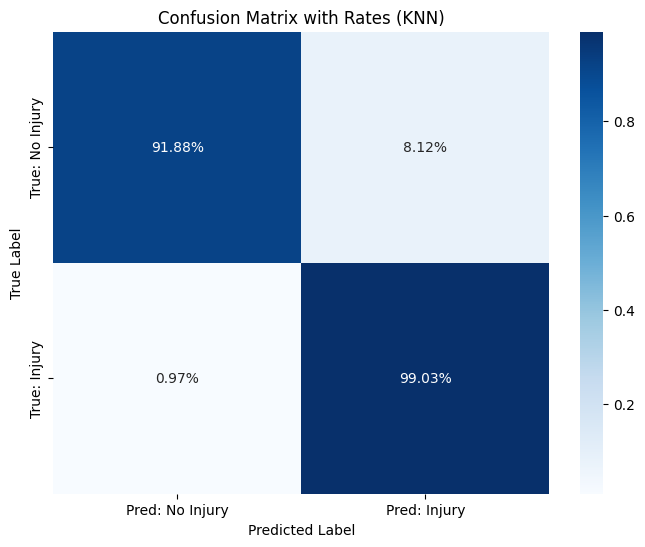

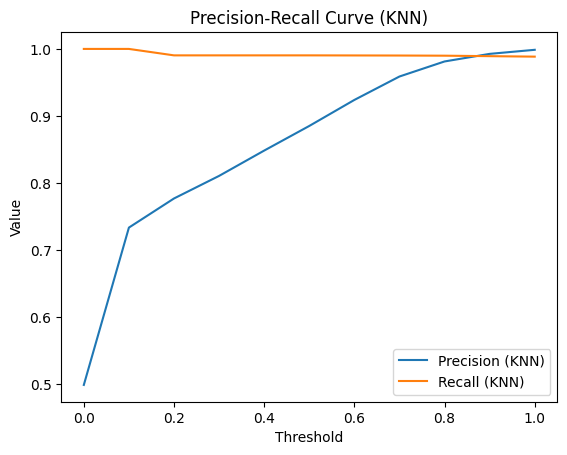

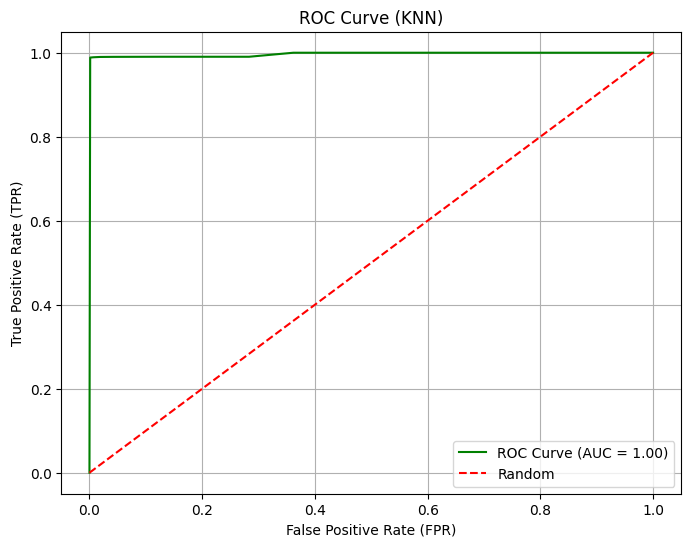

In [ ]:
# 1. K-Nearest Neighbors (KNN) Model
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn.fit(X_train_weekly, y_train_weekly)
y_pred_knn = knn.predict(X_test_weekly)
y_prob_knn = knn.predict_proba(X_test_weekly)[:, 1]

# KNN Evaluation
print("KNN Classification Report:")
print(classification_report(y_test_weekly, y_pred_knn))


# Confusion Matrix for KNN
confm_knn = confusion_matrix(y_test_weekly, y_pred_knn)

# Calculate confusion matrix rates (percentage values)
confm_knn_rate = confm_knn.astype('float') / confm_knn.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix with rates
plt.figure(figsize=(8, 6))
sns.heatmap(confm_knn_rate, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Pred: No Injury', 'Pred: Injury'], yticklabels=['True: No Injury', 'True: Injury'])
plt.title('Confusion Matrix with Rates (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision-Recall curve for KNN
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test_weekly, knn.predict_proba(X_test_weekly)[:, 1])
plt.plot(thresholds_knn, precision_knn[:-1], label="Precision (KNN)")
plt.plot(thresholds_knn, recall_knn[:-1], label="Recall (KNN)")
plt.title("Precision-Recall Curve (KNN)")
plt.xlabel("Threshold")
plt.ylabel("Value")
plt.legend()
plt.show()

# ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test_weekly, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"ROC Curve (AUC = {roc_auc_knn:.2f})", color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.title("ROC Curve (KNN)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8457
           1       1.00      0.92      0.96      8433

    accuracy                           0.96     16890
   macro avg       0.96      0.96      0.96     16890
weighted avg       0.96      0.96      0.96     16890



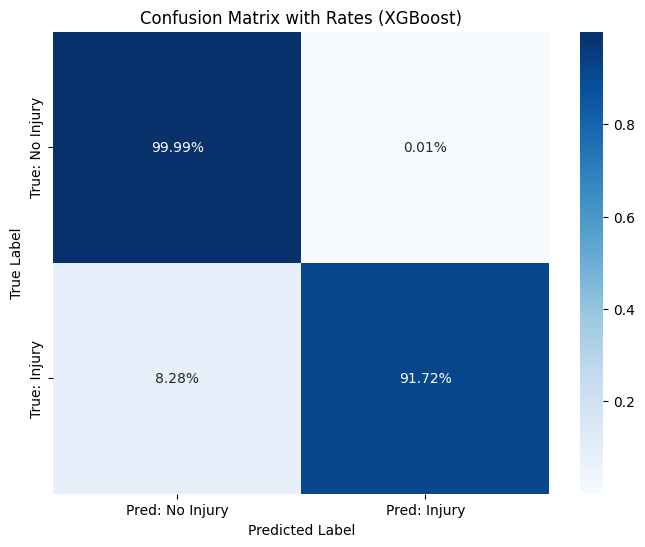

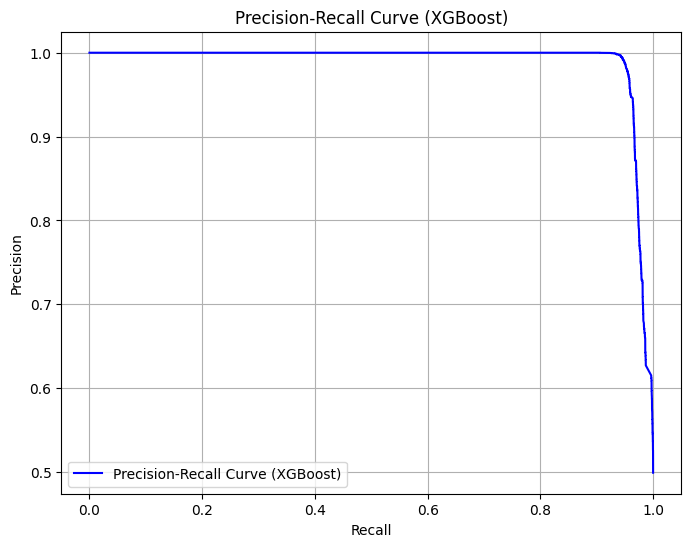

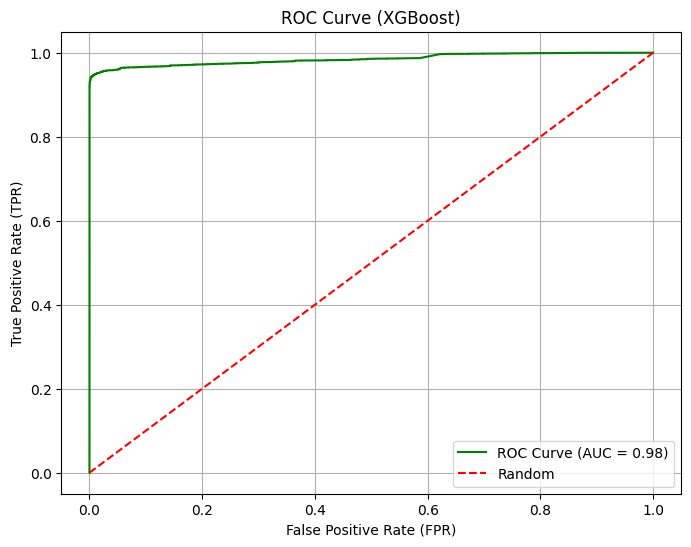

In [ ]:
# 2. XGBoost Model
boost = XGBClassifier(max_depth=2, n_estimators=30, random_state=42)
boost.fit(X_train_weekly, y_train_weekly)
y_pred_boost = boost.predict(X_test_weekly)
y_prob_boost = boost.predict_proba(X_test_weekly)[:, 1]

# XGBoost Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test_weekly, y_pred_boost))

# Confusion Matrix for XGBoost
confm_boost = confusion_matrix(y_test_weekly, y_pred_boost)
confm_boost_rate = confm_boost.astype('float') / confm_boost.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(confm_boost_rate, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Pred: No Injury', 'Pred: Injury'], yticklabels=['True: No Injury', 'True: Injury'])
plt.title('Confusion Matrix with Rates (XGBoost)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision-Recall curve for XGBoost (Precision on Y, Recall on X)
precision_boost, recall_boost, _ = precision_recall_curve(y_test_weekly, y_prob_boost)
plt.figure(figsize=(8, 6))
plt.plot(recall_boost, precision_boost, label="Precision-Recall Curve (XGBoost)", color='b')
plt.title("Precision-Recall Curve (XGBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve for XGBoost
fpr_boost, tpr_boost, _ = roc_curve(y_test_weekly, y_prob_boost)
roc_auc_boost = auc(fpr_boost, tpr_boost)
plt.figure(figsize=(8, 6))
plt.plot(fpr_boost, tpr_boost, label=f"ROC Curve (AUC = {roc_auc_boost:.2f})", color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.title("ROC Curve (XGBoost)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      8457
           1       0.64      0.68      0.66      8433

    accuracy                           0.65     16890
   macro avg       0.65      0.65      0.65     16890
weighted avg       0.65      0.65      0.65     16890



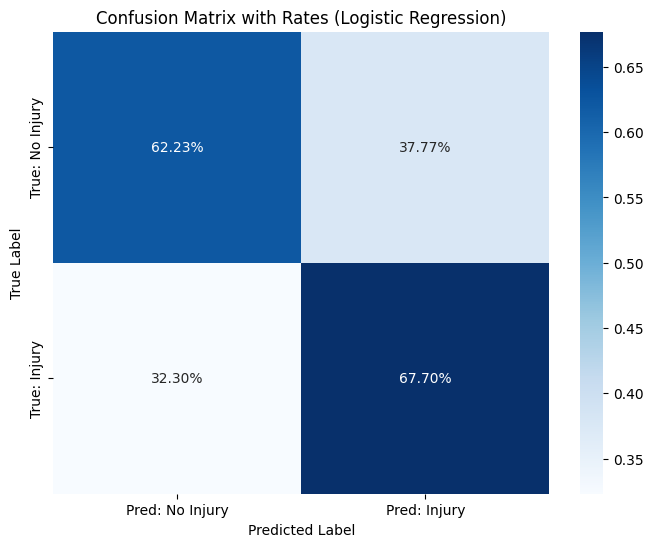

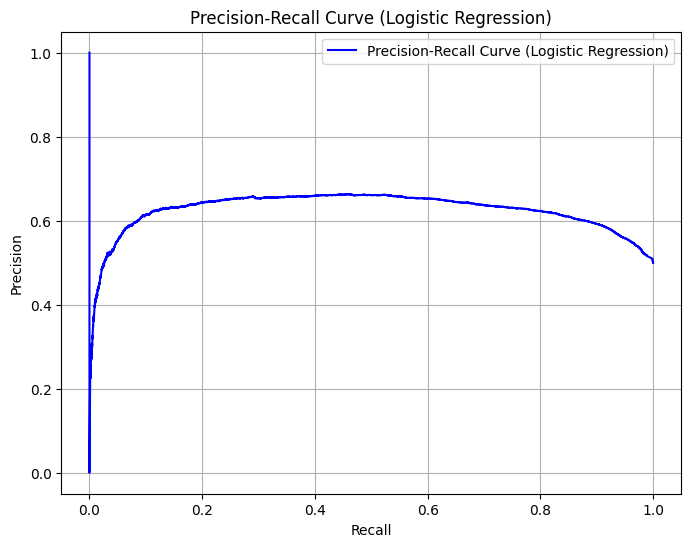

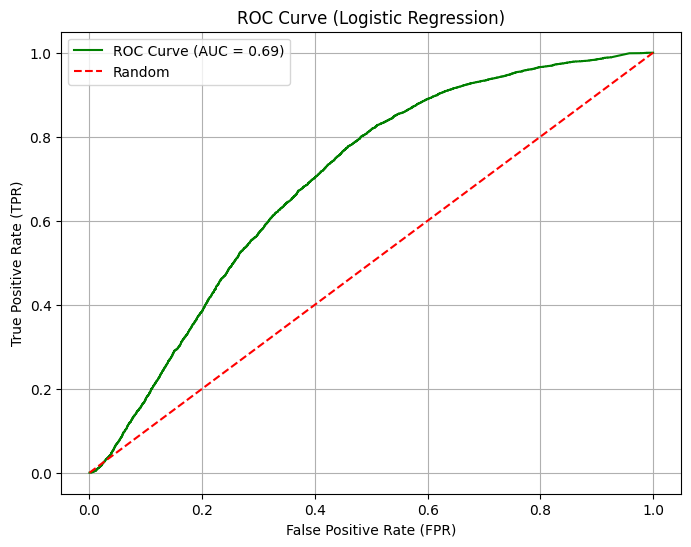

In [ ]:
# 3. Logistic Regression Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_weekly, y_train_weekly)
y_pred_lr = lr.predict(X_test_weekly)
y_prob_lr = lr.predict_proba(X_test_weekly)[:, 1]

# Logistic Regression Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test_weekly, y_pred_lr))

# Confusion Matrix for Logistic Regression
confm_lr = confusion_matrix(y_test_weekly, y_pred_lr)
confm_lr_rate = confm_lr.astype('float') / confm_lr.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(confm_lr_rate, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Pred: No Injury', 'Pred: Injury'], yticklabels=['True: No Injury', 'True: Injury'])
plt.title('Confusion Matrix with Rates (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision-Recall curve for Logistic Regression (Precision on Y, Recall on X)
precision_lr, recall_lr, _ = precision_recall_curve(y_test_weekly, y_prob_lr)
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label="Precision-Recall Curve (Logistic Regression)", color='b')
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_weekly, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"ROC Curve (AUC = {roc_auc_lr:.2f})", color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.title("ROC Curve (Logistic Regression)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8457
           1       1.00      0.98      0.99      8433

    accuracy                           0.99     16890
   macro avg       0.99      0.99      0.99     16890
weighted avg       0.99      0.99      0.99     16890



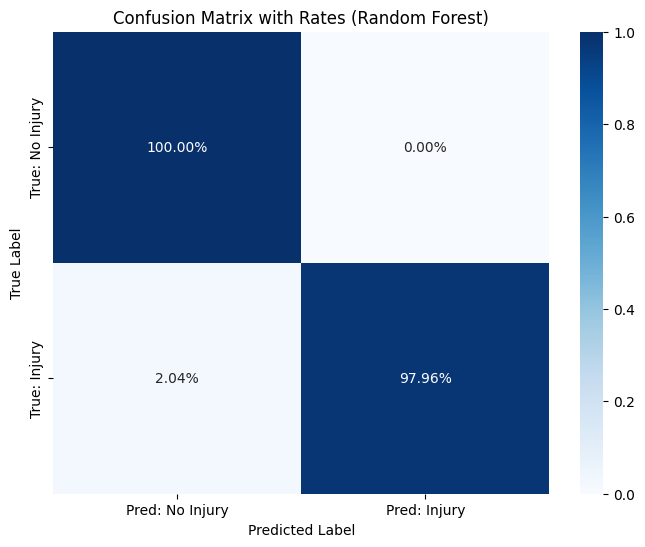

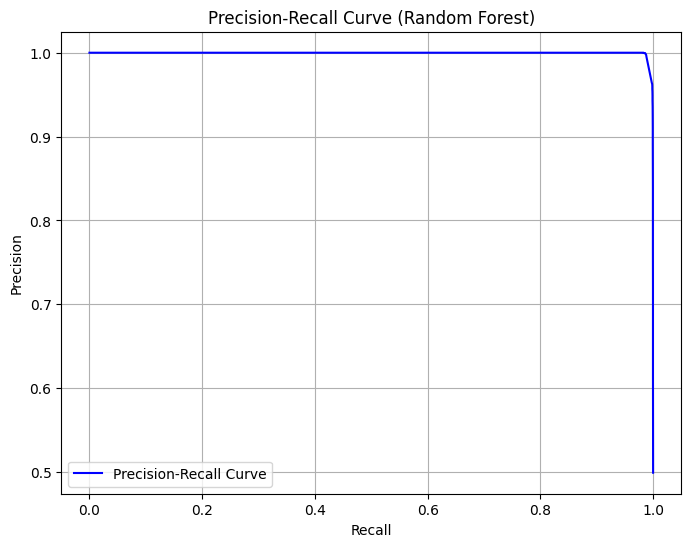

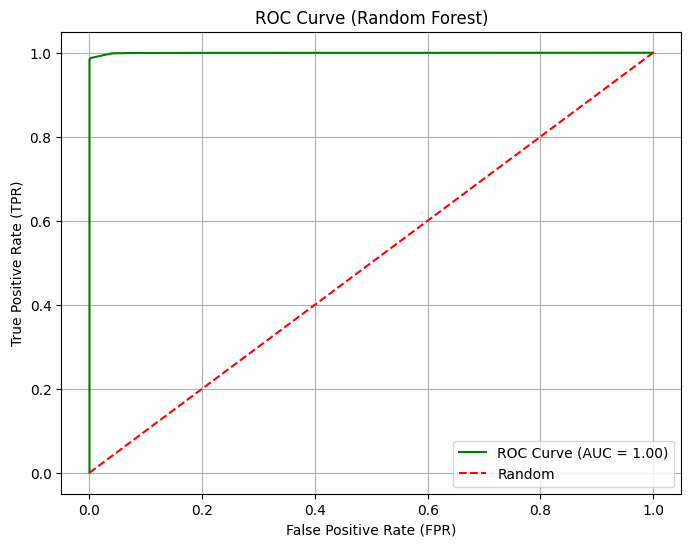

True Positive Rate (TPR) for Random Forest: 0.9796


In [ ]:


# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf.fit(X_train_weekly, y_train_weekly)

# Make predictions
y_pred_rf = rf.predict(X_test_weekly)
y_prob_rf = rf.predict_proba(X_test_weekly)[:, 1]  # Probabilities for the positive class (Injury)

# Random Forest Evaluation - Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test_weekly, y_pred_rf))

# Confusion Matrix
confm_rf = confusion_matrix(y_test_weekly, y_pred_rf)
confm_rf_rate = confm_rf.astype('float') / confm_rf.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(confm_rf_rate, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Pred: No Injury', 'Pred: Injury'], yticklabels=['True: No Injury', 'True: Injury'])
plt.title('Confusion Matrix with Rates (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision-Recall Curve
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test_weekly, y_prob_rf)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label="Precision-Recall Curve", color='b')
plt.title("Precision-Recall Curve (Random Forest)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_weekly, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})", color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.title("ROC Curve (Random Forest)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()

# Extract True Positives (TP) and False Negatives (FN) from the confusion matrix
TP = confm_rf[1, 1]  # True Positive: bottom right
FN = confm_rf[1, 0]  # False Negative: bottom left

# Calculate True Positive Rate (TPR)
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # Avoid division by zero

print(f"True Positive Rate (TPR) for Random Forest: {TPR:.4f}")

In [ ]:
print(weekly_data.columns)


Index(['nr. sessions', 'nr. rest days', 'total kms', 'max km one day',
       'total km Z3-Z4-Z5-T1-T2',
       'nr. tough sessions (effort in Z5, T1 or T2)',
       'nr. days with interval session', 'total km Z3-4',
       'max km Z3-4 one day', 'total km Z5-T1-T2', 'max km Z5-T1-T2 one day',
       'total hours alternative training', 'nr. strength trainings',
       'avg exertion', 'min exertion', 'max exertion', 'avg training success',
       'min training success', 'max training success', 'avg recovery',
       'min recovery', 'max recovery', 'nr. sessions.1', 'nr. rest days.1',
       'total kms.1', 'max km one day.1', 'total km Z3-Z4-Z5-T1-T2.1',
       'nr. tough sessions (effort in Z5, T1 or T2).1',
       'nr. days with interval session.1', 'total km Z3-4.1',
       'max km Z3-4 one day.1', 'total km Z5-T1-T2.1',
       'max km Z5-T1-T2 one day.1', 'total hours alternative training.1',
       'nr. strength trainings.1', 'avg exertion.1', 'min exertion.1',
       'max exertion.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

# Function to analyze injury rate by feature quantiles
def analyze_injury_by_feature(df, feature, bins=4):
    df[f'{feature}_quantile'] = pd.qcut(df[feature], q=bins, duplicates='drop')
    summary = df.groupby(f'{feature}_quantile')["injury"].agg(['count', 'sum'])
    summary['injury_rate'] = summary['sum'] / summary['count']
    print(f"\n{feature} analysis:")
    print(summary)

    # Optional: plot
    sns.barplot(x=summary.index.astype(str), y=summary['injury_rate'])
    plt.title(f"Injury Rate by {feature} Quantile")
    plt.xticks(rotation=45)
    plt.ylabel("Injury Rate")
    plt.xlabel(feature)
    plt.tight_layout()


    # Save as HTML with hover
    file_safe_name = feature.replace(" ", "_").replace(".", "")
    html_path = f"/content/week_approach_{file_safe_name}.html"
    fig = plt.gcf()
    html_str = mpld3.fig_to_html(fig)

    with open(html_path, "w") as f:
        f.write(html_str)

    print(f" Saved interactive HTML to: {html_path}")
    plt.show()



<ipython-input-11-d5122d617d92>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(f'{feature}_quantile')["injury"].agg(['count', 'sum'])



total kms analysis:
                    count  sum  injury_rate
total kms_quantile                         
(-0.001, 22.8]      10713   85     0.007934
(22.8, 44.8]        10702  166     0.015511
(44.8, 70.1]        10698  189     0.017667
(70.1, 242.0]       10685  135     0.012635
 Saved interactive HTML to: /content/week_approach_total_kms.html


/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates._SwitchableDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:303: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.DateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:306: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.ConciseDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: M

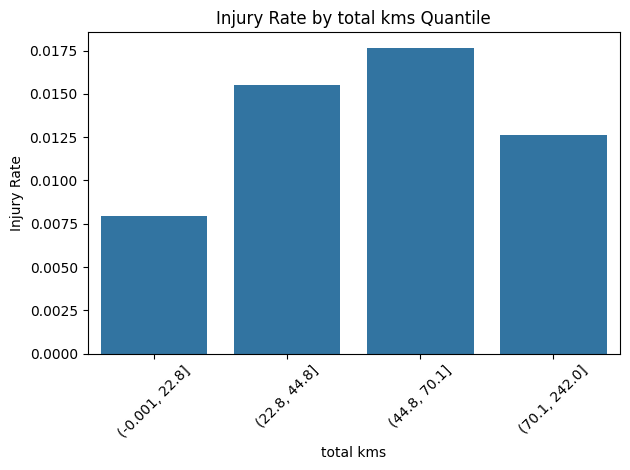

<ipython-input-11-d5122d617d92>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(f'{feature}_quantile')["injury"].agg(['count', 'sum'])



nr. tough sessions (effort in Z5, T1 or T2) analysis:
                                                    count  sum  injury_rate
nr. tough sessions (effort in Z5, T1 or T2)_qua...                         
(-0.001, 1.0]                                       29828  362     0.012136
(1.0, 2.0]                                           9201  149     0.016194
(2.0, 6.0]                                           3769   64     0.016981
 Saved interactive HTML to: /content/week_approach_nr_tough_sessions_(effort_in_Z5,_T1_or_T2).html


/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates._SwitchableDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:303: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.DateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:306: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.ConciseDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: M

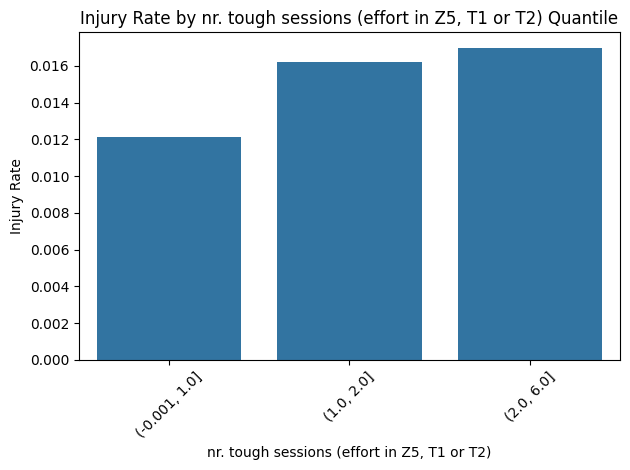

<ipython-input-11-d5122d617d92>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(f'{feature}_quantile')["injury"].agg(['count', 'sum'])



total km Z5-T1-T2 analysis:
                            count  sum  injury_rate
total km Z5-T1-T2_quantile                         
(-0.001, 1.5]               21611  224     0.010365
(1.5, 6.3]                  10537  160     0.015185
(6.3, 80.0]                 10650  191     0.017934


/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates._SwitchableDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:303: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.DateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:306: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.ConciseDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: M

 Saved interactive HTML to: /content/week_approach_total_km_Z5-T1-T2.html


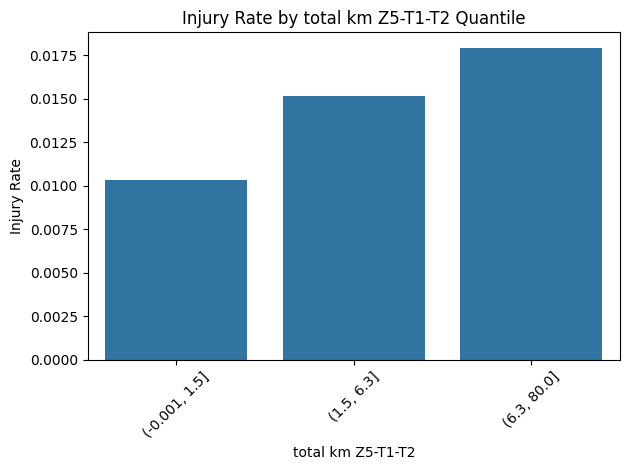

<ipython-input-11-d5122d617d92>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(f'{feature}_quantile')["injury"].agg(['count', 'sum'])



avg recovery analysis:
                       count  sum  injury_rate
avg recovery_quantile                         
(-0.001, 0.15]         12010  100     0.008326
(0.15, 0.22]            9405  103     0.010952
(0.22, 0.36]           11179  186     0.016638
(0.36, 0.9]            10204  186     0.018228


/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates._SwitchableDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:303: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.DateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:306: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.ConciseDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: M

 Saved interactive HTML to: /content/week_approach_avg_recovery.html


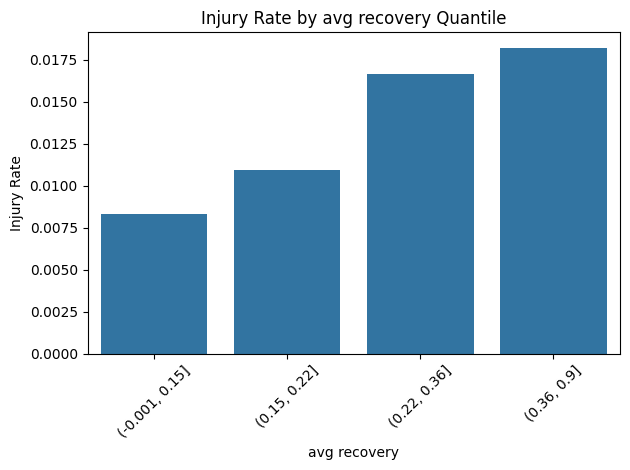

<ipython-input-11-d5122d617d92>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(f'{feature}_quantile')["injury"].agg(['count', 'sum'])



avg exertion analysis:
                       count  sum  injury_rate
avg exertion_quantile                         
(-0.001, 0.14]         12789  101     0.007897
(0.14, 0.32]            8955   81     0.009045
(0.32, 0.48]           10390  168     0.016169
(0.48, 0.98]           10664  225     0.021099


/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates._SwitchableDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:303: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.DateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:306: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.ConciseDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: M

 Saved interactive HTML to: /content/week_approach_avg_exertion.html


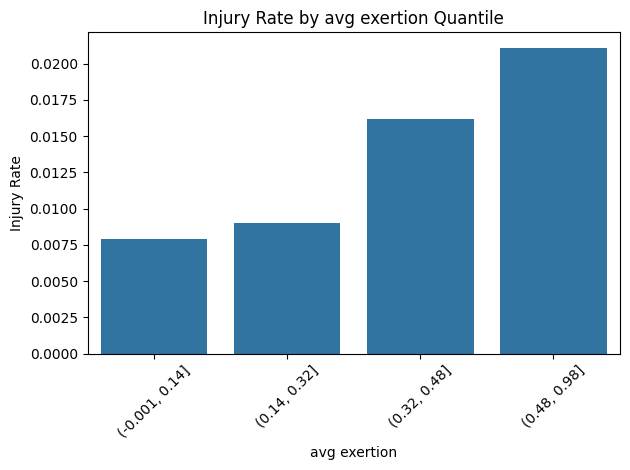

<ipython-input-11-d5122d617d92>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(f'{feature}_quantile')["injury"].agg(['count', 'sum'])



max exertion analysis:
                       count  sum  injury_rate
max exertion_quantile                         
(-0.001, 0.16]         10765   75     0.006967
(0.16, 0.51]           10711   94     0.008776
(0.51, 0.73]           10722  173     0.016135
(0.73, 1.0]            10600  233     0.021981


/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates._SwitchableDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:303: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.DateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:306: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.ConciseDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: M

 Saved interactive HTML to: /content/week_approach_max_exertion.html


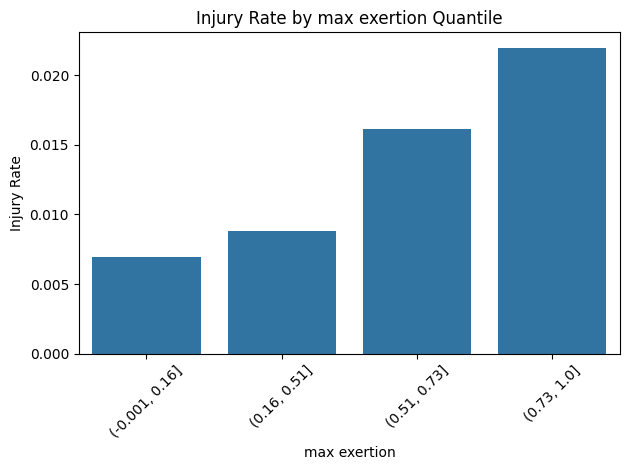

<ipython-input-11-d5122d617d92>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(f'{feature}_quantile')["injury"].agg(['count', 'sum'])



nr. strength trainings analysis:
                                 count  sum  injury_rate
nr. strength trainings_quantile                         
(-0.001, 1.0]                    32988  390     0.011822
(1.0, 9.0]                        9810  185     0.018858


/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates._SwitchableDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:303: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.DateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:306: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.ConciseDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: M

 Saved interactive HTML to: /content/week_approach_nr_strength_trainings.html


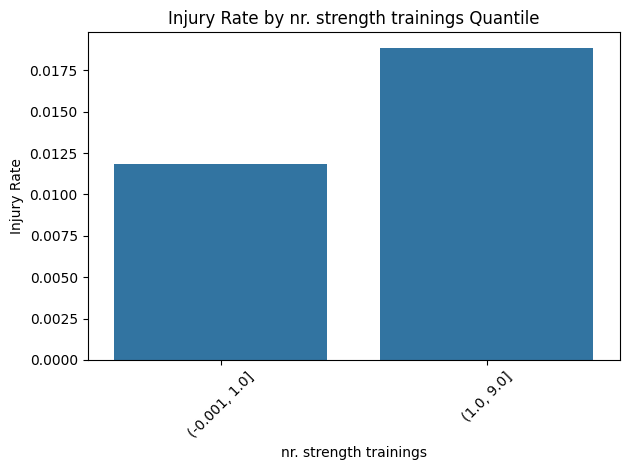

In [12]:
features = [
    "total kms",
    "nr. tough sessions (effort in Z5, T1 or T2)",
    "total km Z5-T1-T2",
    "avg recovery",
    "avg exertion",
    "max exertion",
    "nr. strength trainings"
]


for feat in features:
    analyze_injury_by_feature(weekly_data, feat)
